# P265 - Regression

# Business Objective:
The fundamental goal here is to model the CO2 emissions as a function of several car engine features.

This dataset contains official CO2 emissions data for various car of different features and it has 7385 samples and total 12 features.


# Model :

4WD/4X4 = Four-wheel drive
AWD = All-wheel drive
FFV = Flexible-fuel vehicle
SWB = Short wheelbase
LWB = Long wheelbase
EWB = Extended wheelbase

# Transmission :

A = automatic
AM = automated manual
AS = automatic with select shift
AV = continuously variable
M = manual

# Fuel type :

X = regular gasoline
Z = premium gasoline
D = diesel
E = ethanol (E85)
N = natural gas

# Fuel consumption :

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
df = pd.read_csv("co2_emissions.csv")
df

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [7]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [8]:
df.shape

(7385, 12)

In [9]:
df.dtypes

make                               object
model                              object
vehicle_class                      object
engine_size                       float64
cylinders                           int64
transmission                       object
fuel_type                          object
fuel_consumption_city             float64
fuel_consumption_hwy              float64
fuel_consumption_comb(l/100km)    float64
fuel_consumption_comb(mpg)          int64
co2_emissions                       int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_consumption_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_consumption_comb(l/100km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
fuel_consumption_comb(mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2_emissions,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [12]:
df.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [13]:
df.isna().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [14]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [15]:
df = df.rename(columns={
    'fuel_consumption_comb(l/100km)': 'fuel_consumption_comb_km',
    'fuel_consumption_comb(mpg)': 'fuel_consumption_comb_mpg'
})

In [16]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb_km',
       'fuel_consumption_comb_mpg', 'co2_emissions'],
      dtype='object')

In [17]:
print(df['make'].unique())

['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']


In [18]:
df["make"].value_counts()

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: make, dtype: int64

In [19]:
print(df.model.unique())

['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']


In [20]:
df['model'].value_counts().head()

F-150 FFV 4X4    32
F-150 FFV        32
MUSTANG          27
FOCUS FFV        24
SONIC            20
Name: model, dtype: int64

In [21]:
df['model'].value_counts().tail()

AVENTADOR S ROADSTER    1
HURACAN AWD             1
HURACAN SPYDER AWD      1
LS 500                  1
XC40 T4 AWD             1
Name: model, dtype: int64

In [22]:
print(df.fuel_type.unique())

['Z' 'D' 'X' 'E' 'N']


In [23]:
df['fuel_type'].value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: fuel_type, dtype: int64

In [24]:
print(df.engine_size.unique())

[2.  2.4 1.5 3.5 3.7 1.8 5.9 4.7 3.  4.  6.3 4.2 5.2 6.  6.8 4.4 3.6 1.4
 2.5 6.2 4.3 5.3 4.8 1.2 5.7 6.4 4.6 5.4 1.6 5.  1.  5.8 3.8 3.3 5.6 3.2
 6.5 5.5 2.1 3.4 2.7 6.6 6.7 1.3 8.4 2.3 2.8 0.9 2.9 8.  2.2]


In [25]:
df['engine_size'].value_counts()

2.0    1460
3.0     804
3.6     536
3.5     529
2.5     423
2.4     346
1.6     302
5.3     290
1.8     216
1.4     211
5.0     207
1.5     207
4.0     198
6.2     162
4.4     131
5.7     116
3.8     114
3.7     112
2.7      99
6.0      94
3.3      85
4.7      78
3.4      52
5.5      52
4.3      52
2.3      51
5.2      48
6.4      46
5.6      36
3.2      35
4.8      32
4.6      32
6.6      29
1.2      25
6.7      25
2.8      24
2.9      23
1.0      18
6.5      18
4.2      14
1.3      11
5.4       8
6.8       8
2.1       5
8.4       5
5.9       5
6.3       3
0.9       3
8.0       3
5.8       1
2.2       1
Name: engine_size, dtype: int64

In [26]:
print(df.cylinders.unique())

[ 4  6 12  8 10  3  5 16]


In [27]:
df['cylinders'].value_counts()

4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: cylinders, dtype: int64

In [28]:
print(df['vehicle_class'].unique())

['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


In [29]:
df['vehicle_class'].value_counts()

SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: vehicle_class, dtype: int64

In [30]:
df[df['cylinders']==16]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb_km,fuel_consumption_comb_mpg,co2_emissions
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM,Z,26.8,16.6,22.2,13,522
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM,Z,26.8,16.6,22.2,13,522
6640,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM,Z,26.8,16.6,22.2,13,522


In [31]:
df.iloc[1076]

make                            ACURA
model                             RLX
vehicle_class                MID-SIZE
engine_size                       3.5
cylinders                           6
transmission                       AS
fuel_type                           Z
fuel_consumption_city            11.9
fuel_consumption_hwy              7.7
fuel_consumption_comb_km         10.0
fuel_consumption_comb_mpg          28
co2_emissions                     230
Name: 1076, dtype: object

In [32]:
data_num_features = df.select_dtypes(include=np.number)
print(data_num_features.columns)

Index(['engine_size', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb_km',
       'fuel_consumption_comb_mpg', 'co2_emissions'],
      dtype='object')


In [33]:
data_obj_features = df.select_dtypes(include='object')
print(data_obj_features.columns)

Index(['make', 'model', 'vehicle_class', 'transmission', 'fuel_type'], dtype='object')


In [34]:
df.describe(include = object).T

,count,unique,top,freq
make,7385,42,FORD,628
model,7385,2053,F-150 FFV 4X4,32
vehicle_class,7385,16,SUV - SMALL,1217
transmission,7385,5,AS,3127
fuel_type,7385,5,X,3637


In [35]:
duplicate = df.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 1112 duplicated rows in the data


In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.reset_index(inplace=True,drop=True)

In [38]:
df

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb_km,fuel_consumption_comb_mpg,co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
6268,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
6269,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
6270,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
6271,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [39]:
print(df.duplicated().sum())

0


array([[<AxesSubplot:title={'center':'engine_size'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'fuel_consumption_city'}>],
       [<AxesSubplot:title={'center':'fuel_consumption_hwy'}>,
        <AxesSubplot:title={'center':'fuel_consumption_comb_km'}>,
        <AxesSubplot:title={'center':'fuel_consumption_comb_mpg'}>],
       [<AxesSubplot:title={'center':'co2_emissions'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

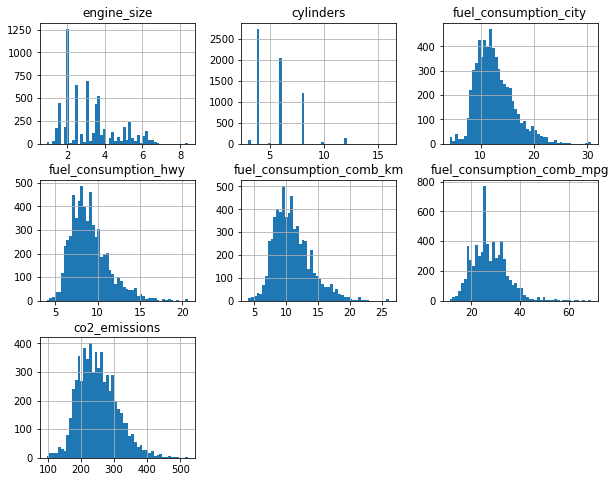

In [40]:
df.hist(figsize=(10,8),bins=50)

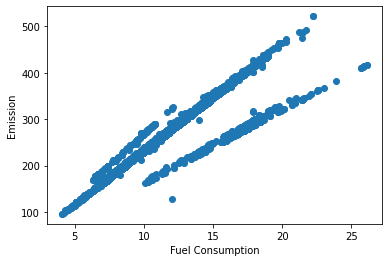

In [41]:
plt.scatter(df.fuel_consumption_comb_km,df.co2_emissions)
plt.xlabel('Fuel Consumption')
plt.ylabel('Emission')
plt.show()

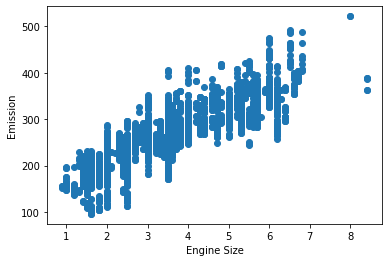

In [46]:
plt.scatter(df.engine_size,df.co2_emissions)
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

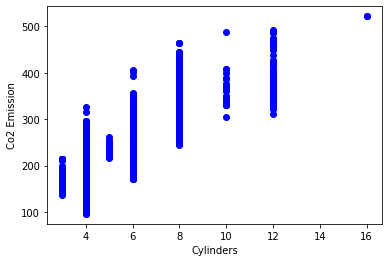

In [47]:
plt.scatter(df.cylinders,df.co2_emissions, color = 'blue')
plt.xlabel('Cylinders')
plt.ylabel('Co2 Emission')
plt.show()

In [48]:
df.corr()['co2_emissions'].sort_values()

fuel_consumption_comb_mpg   -0.906839
cylinders                    0.834697
engine_size                  0.854999
fuel_consumption_hwy         0.883153
fuel_consumption_comb_km     0.916611
fuel_consumption_city        0.918528
co2_emissions                1.000000
Name: co2_emissions, dtype: float64

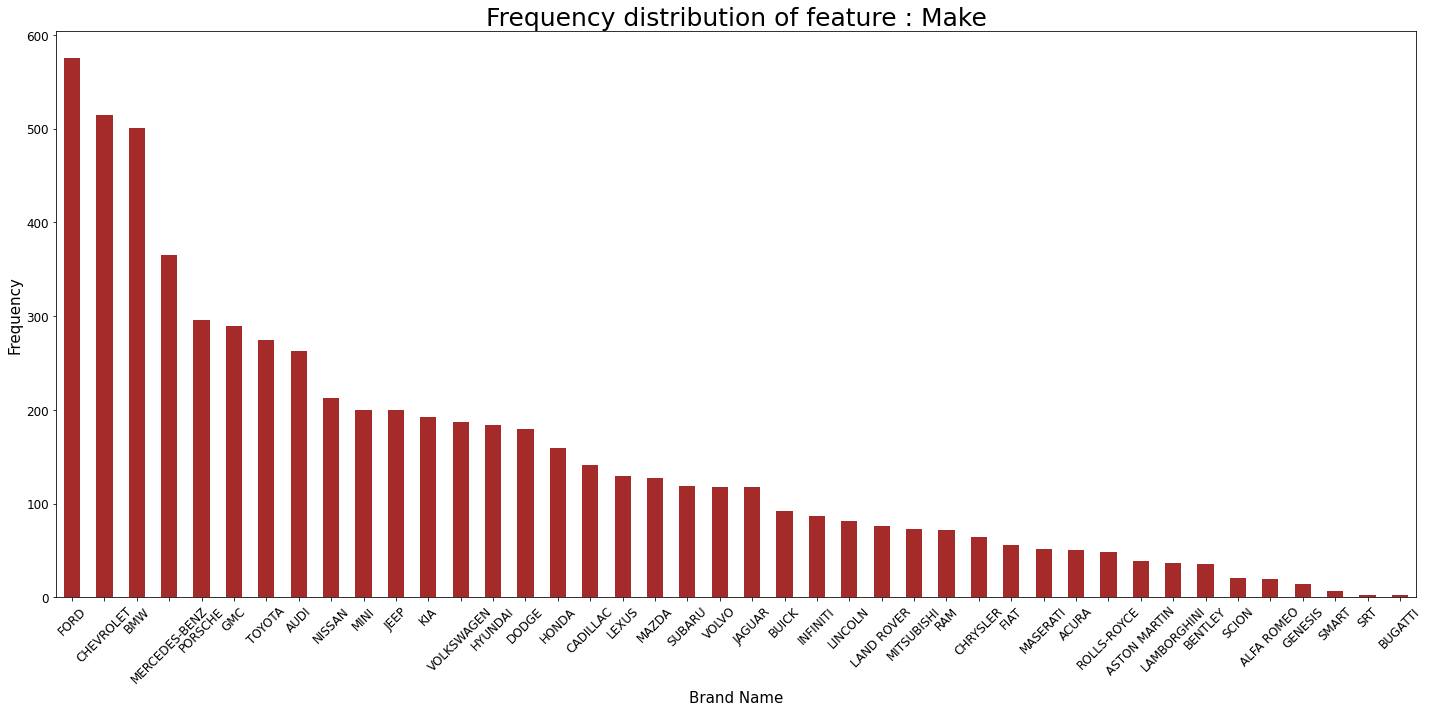

In [49]:
plt.figure(figsize=(20,10));
df.groupby("make")["make"].count().sort_values(ascending=False).plot(kind="bar",color='brown',fontsize=12)
plt.title("Frequency distribution of feature : Make", fontsize=25)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Brand Name", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

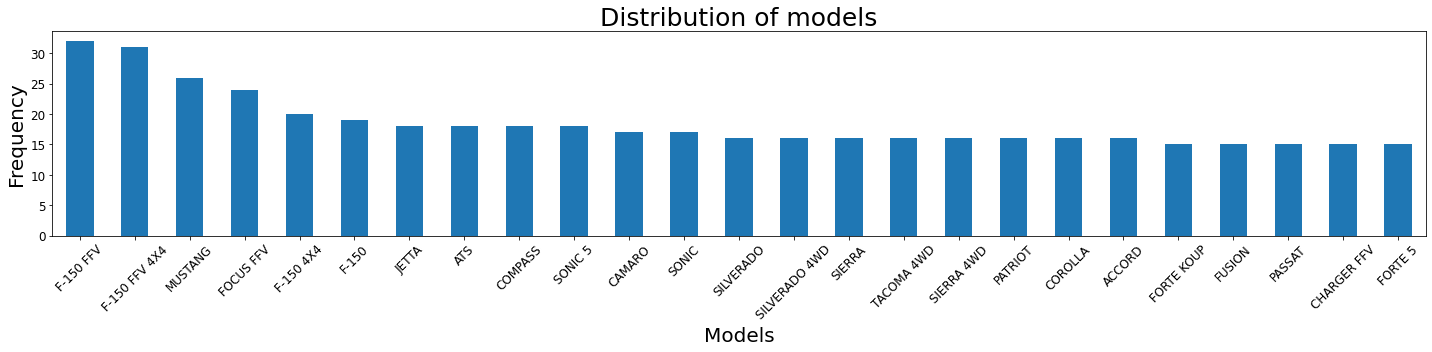

In [50]:
plt.figure(figsize=(20,5))

df.groupby('model')['model'].count().sort_values(ascending=False)[:25].plot(kind='bar',fontsize=12)

plt.title('Distribution of models', fontsize=25)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

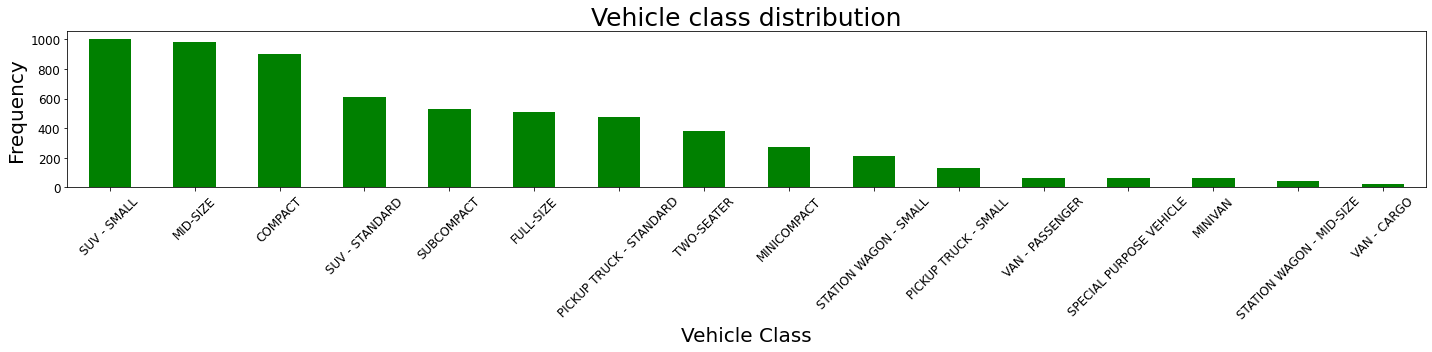

In [51]:
plt.figure(figsize=(20,5))

df.groupby('vehicle_class')['vehicle_class'].count().sort_values(ascending=False).plot(kind='bar', color='green',fontsize=12)

plt.title('Vehicle class distribution', fontsize=25)
plt.xlabel('Vehicle Class', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

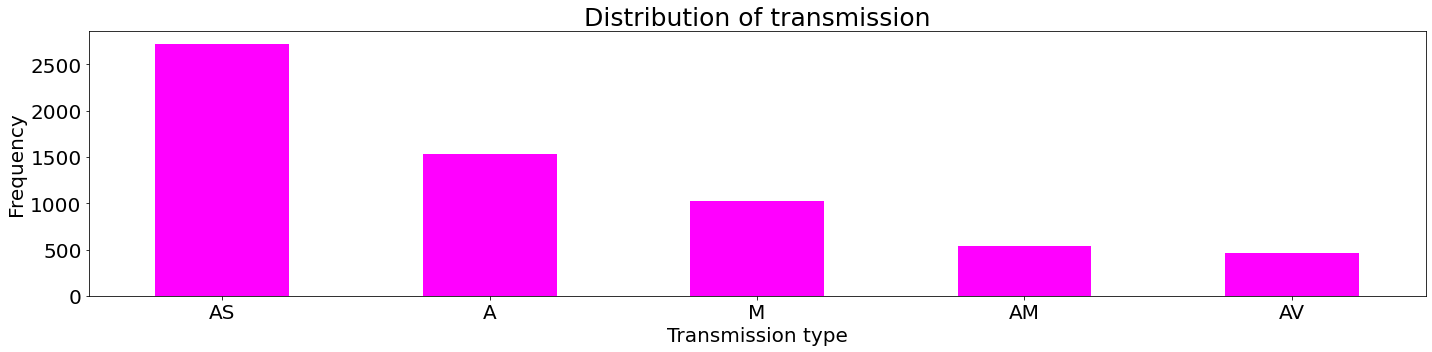

In [52]:
plt.figure(figsize=(20,5))

df.groupby('transmission')['transmission'].count().sort_values(ascending=False).plot(kind='bar', color='magenta', fontsize=20)

plt.title('Distribution of transmission', fontsize=25)
plt.xlabel('Transmission type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

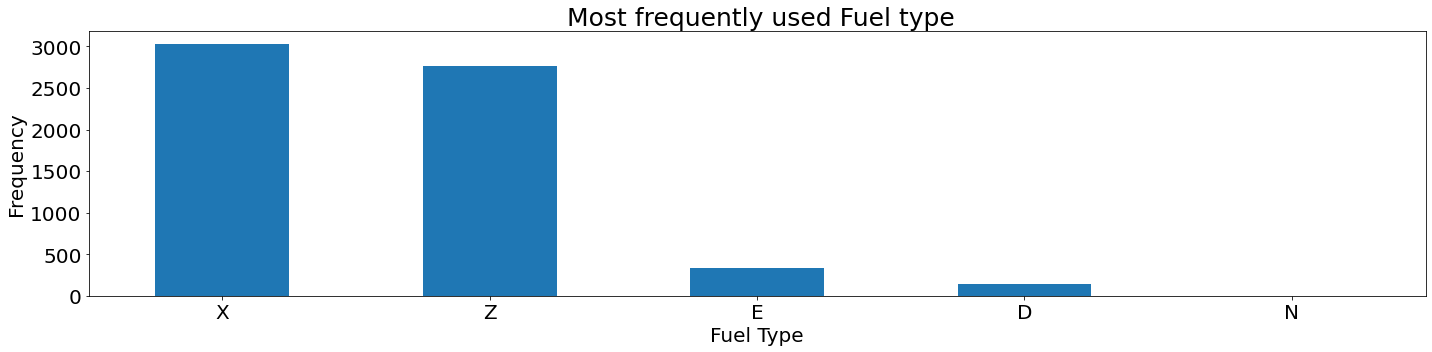

In [53]:
plt.figure(figsize=(20,5))

df.groupby('fuel_type')['fuel_type'].count().sort_values(ascending=False).plot(kind='bar', fontsize=20)

plt.title(' Most frequently used Fuel type', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

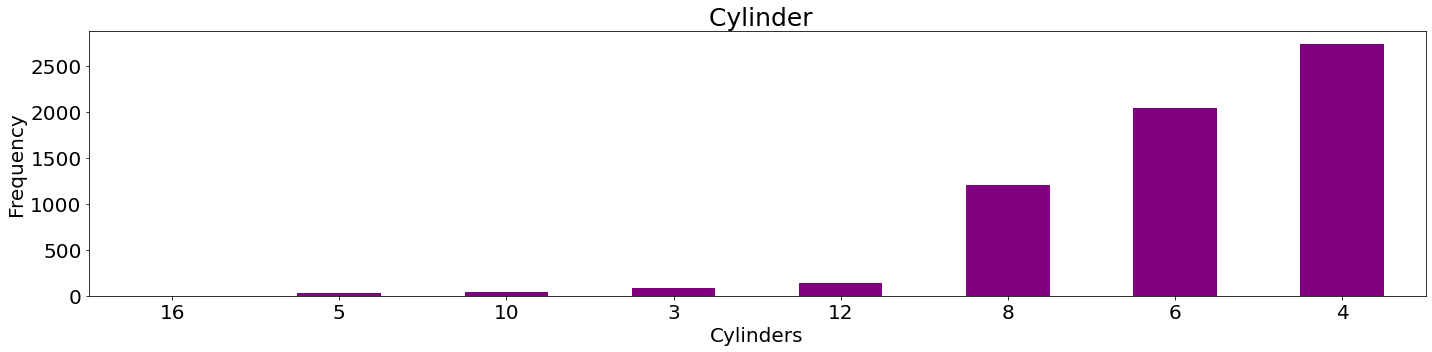

In [54]:
plt.figure(figsize=(20,5))

df.groupby('cylinders')['cylinders'].count().sort_values(ascending=True).plot(kind='bar', color='purple', fontsize=20)

plt.title(' Cylinder', fontsize=25)
plt.xlabel('Cylinders', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

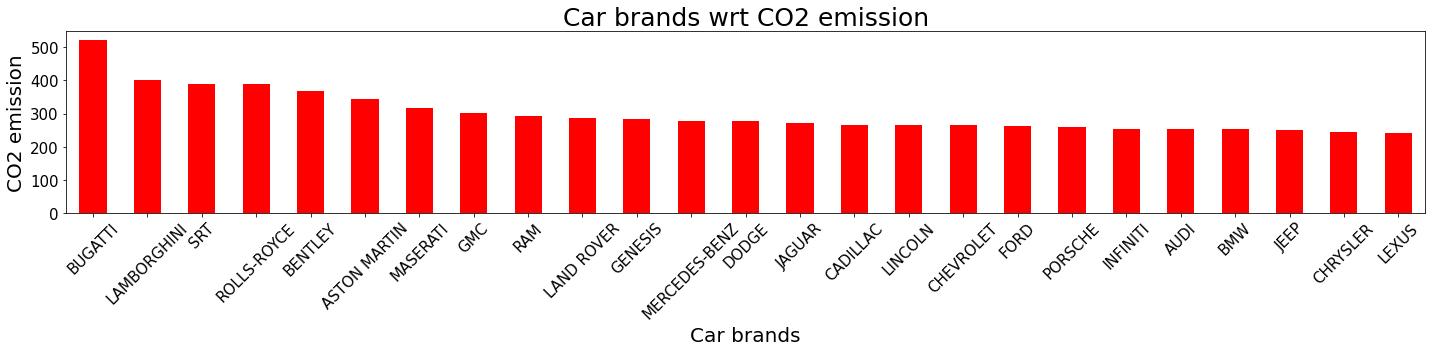

In [55]:
# Visualisation wrt CO2 emision

plt.figure(figsize=(20,5))

df.groupby('make')['co2_emissions'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='red',fontsize=15)

plt.title('Car brands wrt CO2 emission', fontsize=25)
plt.xlabel('Car brands', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

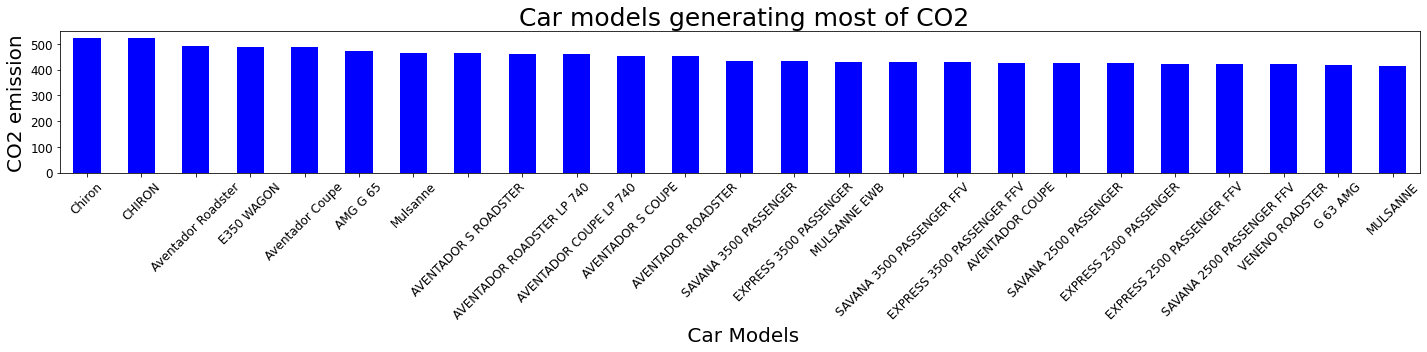

In [56]:
plt.figure(figsize=(20,5))

df.groupby('model')['co2_emissions'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='blue',fontsize=12)

plt.title(' Car models generating most of CO2', fontsize=25)
plt.xlabel(' Car Models', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

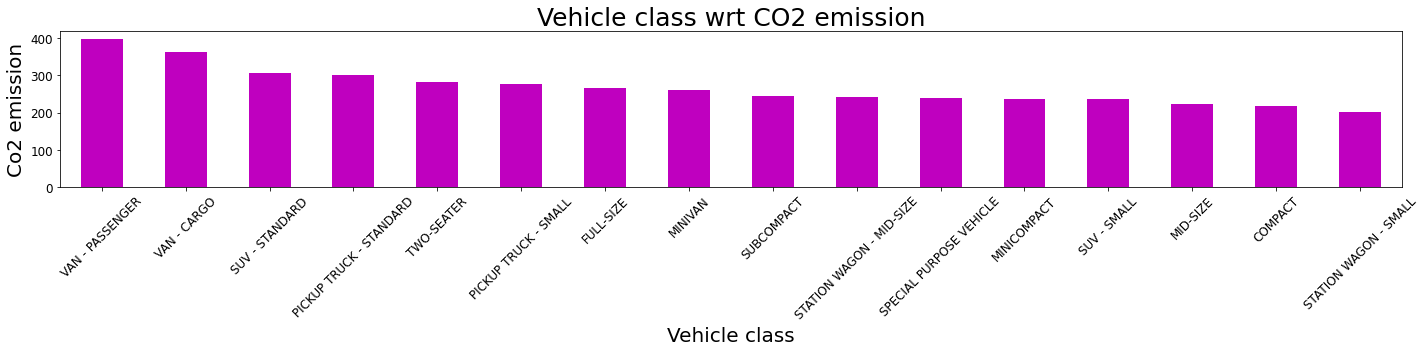

In [57]:
plt.figure(figsize=(20,5))

df.groupby('vehicle_class')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',color='m',fontsize=12)

plt.title('Vehicle class wrt CO2 emission', fontsize=25)
plt.xlabel('Vehicle class' , fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

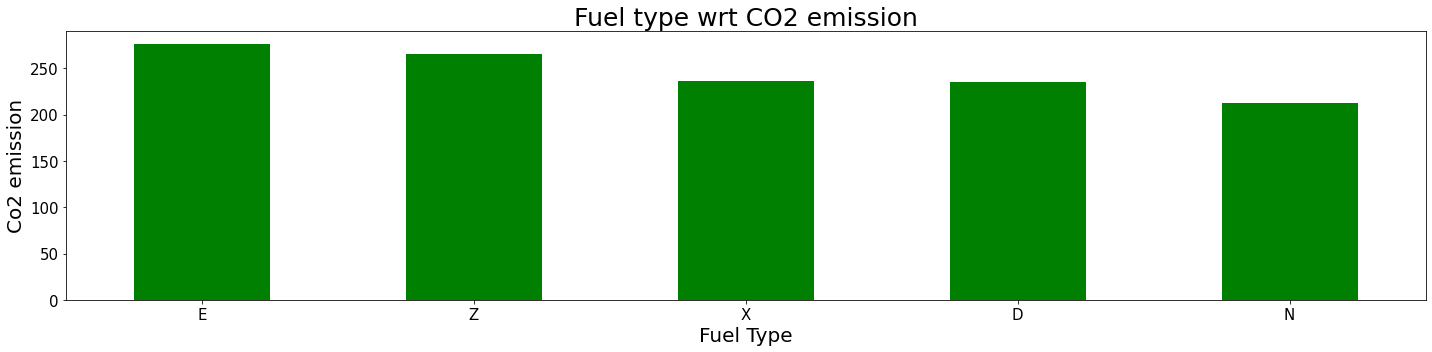

In [58]:
plt.figure(figsize=(20,5))

df.groupby('fuel_type')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',color='g',fontsize=15)

plt.title('Fuel type wrt CO2 emission', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

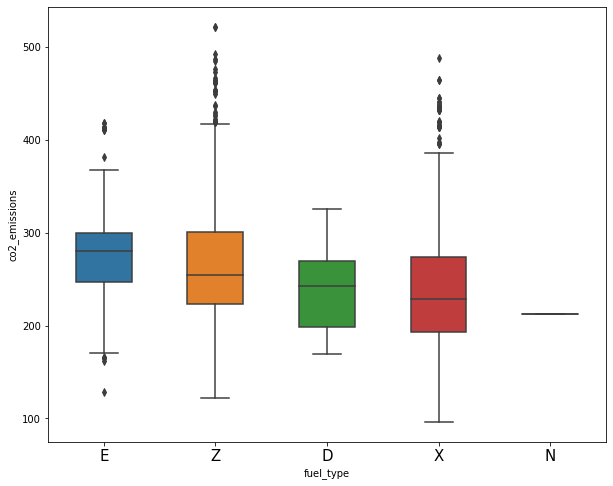

In [59]:
fuel_type = df.groupby('fuel_type')['co2_emissions'].median().sort_values(ascending=False).index
plt.figure(figsize=(10,8))
sns.boxplot(x = 'fuel_type', y='co2_emissions', data =df, order=fuel_type, width=0.5)
plt.xticks(rotation=0, horizontalalignment='center',fontsize=15)

plt.show()

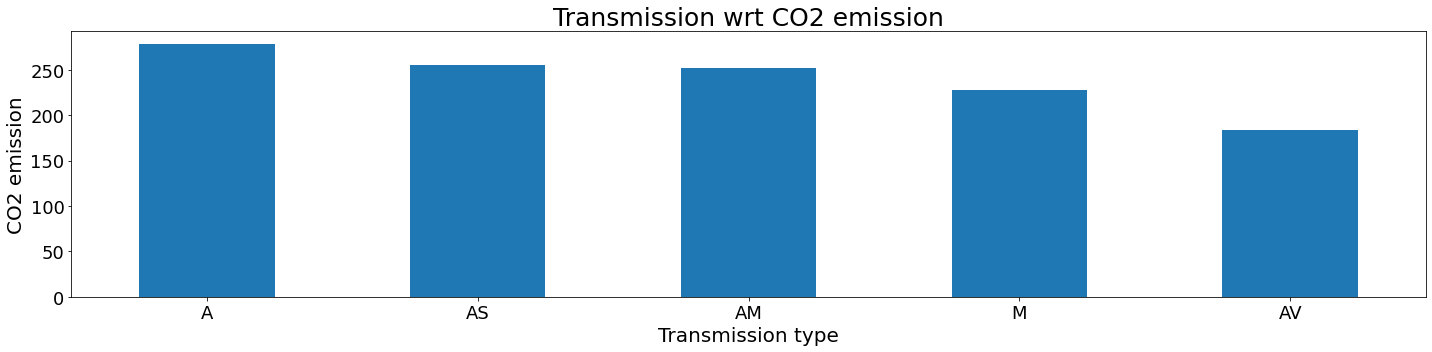

In [60]:
plt.figure(figsize=(20,5))

df.groupby('transmission')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',fontsize=18)

plt.title('Transmission wrt CO2 emission', fontsize=25)
plt.xlabel('Transmission type', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

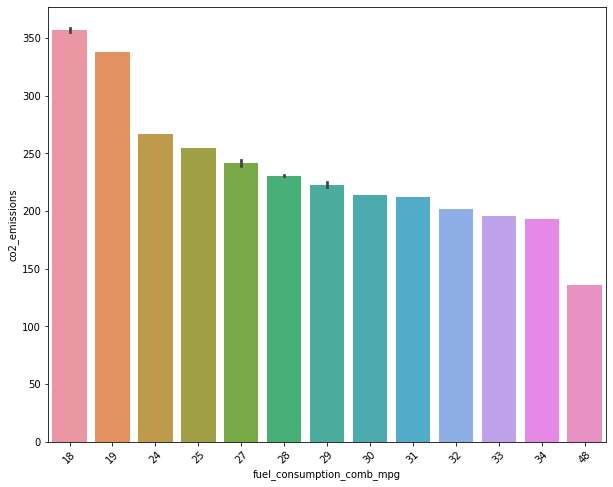

In [61]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'fuel_consumption_comb_mpg', y='co2_emissions', data =df[:25])

plt.xticks(rotation=45)
plt.show()

<Figure size 720x576 with 0 Axes>

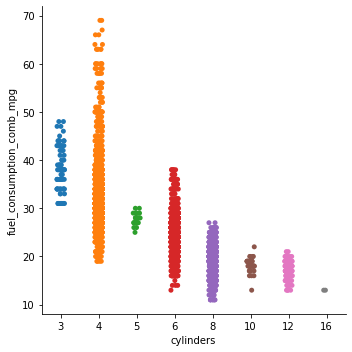

In [62]:
plt.figure(figsize=(10,8))

sns.catplot(x='cylinders', y='fuel_consumption_comb_mpg',data = df)

plt.show()  

<Figure size 720x576 with 0 Axes>

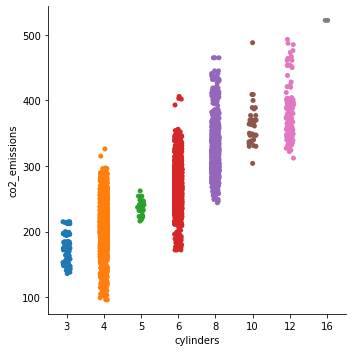

In [63]:
plt.figure(figsize=(10,8))

sns.catplot(x='cylinders', y='co2_emissions',data = df)

plt.show()         

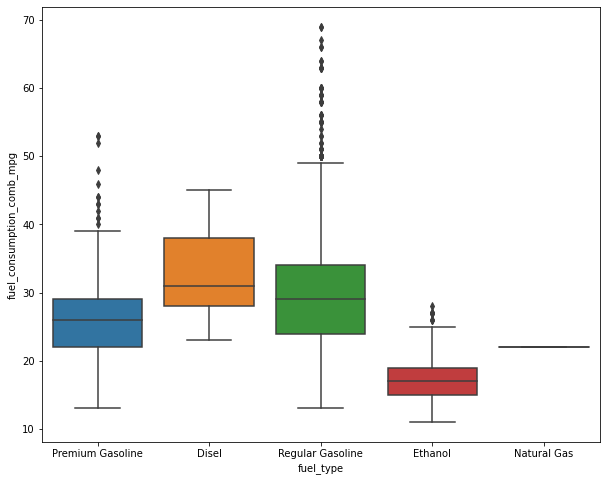

In [64]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'fuel_type', y='fuel_consumption_comb_mpg', data =df)

plt.xticks([0,1,2,3,4],['Premium Gasoline','Disel', 'Regular Gasoline','Ethanol', 'Natural Gas'])
plt.show()   

In [65]:
df['transmission'].value_counts()

AS    2720
A     1536
M     1019
AM     540
AV     458
Name: transmission, dtype: int64

In [66]:
df['fuel_type'].value_counts()

X    3030
Z    2765
E     330
D     147
N       1
Name: fuel_type, dtype: int64

In [67]:
ds_N = df[df['fuel_type'] == 'N']

ind = ds_N.index

ds_N

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb_km,fuel_consumption_comb_mpg,co2_emissions
2232,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,AS,N,15.2,9.5,12.7,22,213


In [68]:
for i in ind:
    df.drop(i, axis=0, inplace=True) 

In [69]:
df[df['fuel_type']=='N']

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb_km,fuel_consumption_comb_mpg,co2_emissions


In [70]:
# creating dummy variables of fuel type and transmission (catagorical features)

d_v =pd.get_dummies(df['fuel_type'], prefix='fuel', drop_first=True)
dv = pd.get_dummies(df["transmission"], drop_first=True)
d_v.head()

,fuel_E,fuel_X,fuel_Z
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [71]:
dv.head()

,AM,AS,AV,M
0,0,1,0,0
1,0,0,0,1
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [72]:
df1 = [df, d_v,dv]

data = pd.concat(df1, axis=1)
data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb_km,fuel_consumption_comb_mpg,co2_emissions,fuel_E,fuel_X,fuel_Z,AM,AS,AV,M
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196,0,0,1,0,1,0,0
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221,0,0,1,0,0,0,1
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136,0,0,1,0,0,1,0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255,0,0,1,0,1,0,0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244,0,0,1,0,1,0,0


In [92]:
data.drop(['fuel_type'], inplace=True, axis=1)
data.drop(['transmission'], inplace=True, axis=1)

In [93]:
df_freq = data['make'].value_counts().to_dict()
mod_freq = data['model'].value_counts().to_dict()
veh_freq = data['vehicle_class'].value_counts().to_dict()

In [94]:
data['make'] = data['make'].map(df_freq)
data['model'] = data['model'].map(mod_freq)
data['vehicle_class'] = data['vehicle_class'].map(veh_freq)

In [95]:
data.head()

,make,model,vehicle_class,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb_km,fuel_consumption_comb_mpg,co2_emissions,fuel_E,fuel_X,fuel_Z,AM,AS,AV,M
0,51,189,902,2.0,4,9.9,6.7,8.5,33,196,0,0,1,0,1,0,0
1,51,189,902,2.4,4,11.2,7.7,9.6,29,221,0,0,1,0,0,0,1
2,51,1062,902,1.5,4,6.0,5.8,5.9,48,136,0,0,1,0,0,1,0
3,51,704,1004,3.5,6,12.7,9.1,11.1,25,255,0,0,1,0,1,0,0
4,51,760,1004,3.5,6,12.1,8.7,10.6,27,244,0,0,1,0,1,0,0


In [96]:
X = data.drop('co2_emissions', axis=1)
y = data['co2_emissions']

In [97]:
X.head()

,make,model,vehicle_class,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb_km,fuel_consumption_comb_mpg,fuel_E,fuel_X,fuel_Z,AM,AS,AV,M
0,51,189,902,2.0,4,9.9,6.7,8.5,33,0,0,1,0,1,0,0
1,51,189,902,2.4,4,11.2,7.7,9.6,29,0,0,1,0,0,0,1
2,51,1062,902,1.5,4,6.0,5.8,5.9,48,0,0,1,0,0,1,0
3,51,704,1004,3.5,6,12.7,9.1,11.1,25,0,0,1,0,1,0,0
4,51,760,1004,3.5,6,12.1,8.7,10.6,27,0,0,1,0,1,0,0


In [98]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: co2_emissions, dtype: int64

In [99]:
data.shape

(6272, 17)

# KFold Cross Validation

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [177]:
# Linear Regression
li = LinearRegression()
li.fit(X_train, y_train)
li.score(X_test, y_test)

0.9933020615372428

In [178]:
#SVM

svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.09670563230605739

In [179]:
#Random Forest

rf = RandomForestClassifier(n_estimators=60)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.40807651434643993

In [180]:
#KFold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf    

KFold(n_splits=3, random_state=None, shuffle=False)

In [181]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [182]:
# Use KFold for our data

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [183]:
for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)    
    print(train_index, test_index)

[2091 2092 2093 ... 6269 6270 6271] [   0    1    2 ... 2088 2089 2090]
[   0    1    2 ... 6269 6270 6271] [2091 2092 2093 ... 4179 4180 4181]
[   0    1    2 ... 4179 4180 4181] [4182 4183 4184 ... 6269 6270 6271]


In [185]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_linear = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)    
    scores_linear.append(get_score(LinearRegression(), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=60), X_train, X_test, y_train, y_test))

In [186]:
scores_linear

[0.9917059431461159, 0.9915995952196192, 0.9925813327726347]

In [187]:
scores_svm

[0.09139213602550478, 0.08926673751328375, 0.09936238044633369]

In [188]:
scores_rf

[0.40807651434643993, 0.4070138150903294, 0.4086078639744952]

In [193]:
#cross_val_score function

from sklearn.model_selection import cross_val_score

In [190]:
# linear regression model performance using cross_val_score

cross_val_score(LinearRegression(), X, y,cv=3)

array([0.98002579, 0.99091052, 0.99363046])

In [191]:
# svm model performance using cross_val_score

cross_val_score(SVC(gamma='auto'), X, y,cv=3)

array([0.07269249, 0.09373505, 0.06363636])

In [192]:
#andom forest performance using cross_val_score

cross_val_score(RandomForestClassifier(n_estimators=60),X, y,cv=3)

array([0.21855571, 0.33955045, 0.24162679])